In [7]:
# OUR TASK. Import request & beutiful soup
import requests
import bs4
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

def create_soup(url,tag_name):
    page = requests.get(url)
    soup = bs4.BeautifulSoup(page.text,"lxml")
    result = soup.select(tag_name)
    return result

def get_row_label(current_country, current_province):
    if current_province == '':
        result = current_country
    else:
        result = current_country+':-'+current_province
    return result

# SEARCH ITEMS hhhh
def find_exact(dictionary, search_string):
    result = dictionary.get(search_string)
    return result

def find_wildcard(dictionary,search_string):
    output_dictionary={}
    for key,val in dictionary.items():
        if search_string in key:
            output_dictionary[key] = val
    return output_dictionary


def transpose_for_dataframe(covstats_result):
    row_count = len(covstats_result[1])-1
    
    result={}
    headers = covstats_result[2]
    transposed_result = list(map(list, zip(*covstats_result[1])))  
    transposed_result_row_count = len(transposed_result) -1
    
    for n in range(transposed_result_row_count):   
        result.update({headers[n]:transposed_result[n]})
    return result

def transpose_for_dataframe2(covstats_result):
    row_count = len(covstats_result[2])

    result={}
    headers = covstats_result[3]
    transposed_result = list(map(list, zip(*covstats_result[2])))  
    transposed_result_len = len(transposed_result)
    print(row_count)
    print(transposed_result_len)
    #for n in range(row_count):   
     #   print(headers[n])

    

            
def get_covstats(url,tag):
    data = create_soup(url,tag) 
    #Create Resulting List
    country_lookup = []
    simple_list_output=[]
    #Create Header Row
    headers = data[0].getText()
    headers_list = headers.split('\n')
    headers_list_cleaned = headers_list[2:]

    # data[128:140] this will produce 11 rows
    for item in data[1:]:
        item_text = item.getText()
        item_list = item_text.split('\n')
        #item_list[3-5] is limiting the columns for testing purposes
        item_list_cleaned = item_list[2:]
    
        dictionary_row = dict(zip(headers_list_cleaned, item_list_cleaned))

        # put it into summary list
        current_province =  dictionary_row["Province/State"]
        current_country = dictionary_row["Country/Region"] 
        row_label = get_row_label(current_country, current_province)
        item_number = item.key
        #print(item_number)
        #1. build a SET of countries (FOR LOOKUP)
        country_lookup.append(row_label) 
        #3 Build just a list
        simple_list_output.append(item_list_cleaned)
        
    return [country_lookup,  simple_list_output,  headers_list_cleaned]

In [31]:
#Create our Data
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
tag = '.js-file-line'

covstats_result = get_covstats(url,tag)
input_data_for_dataframe = transpose_for_dataframe(covstats_result)


covid_dataframe = DataFrame(input_data_for_dataframe)
covid_dataframe



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1846,1864,1874,1900,1906,1919,1935,1945,1956,1965
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,870,889,905,922,936,951,965,977,989,1003
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2492,2501,2516,2527,2539,2554,2564,2575,2584,2596
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,77,78,78,78,78,78,78,78,78,79
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,353,354,354,354,355,358,362,365,366,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
267,,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,797,812,828,848,867,890,910,931,961,978
268,,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,627,633,639,649,606,606,606,606,606,606
269,,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,364,364,364,364,364,364,364,365,366,367


In [32]:
#Working with our dataframe
test_dataframe = covid_dataframe

In [33]:
# GET UK
all_uk = test_dataframe.loc[test_dataframe['Country/Region'].isin(['United Kingdom'])]
uk_mainland = all_uk.loc[all_uk['Province/State'].isin([''])]

all_australia = test_dataframe.loc[test_dataframe['Country/Region'].isin(['Australia'])]

sweden = test_dataframe.loc[test_dataframe['Country/Region'].isin(['Sweden'])]


In [34]:
sweden

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
235,,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,7067,7067,7067,7067,7200,7296,7354,7514,7514,7514


In [35]:
uk_mainland

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
261,,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,60617,61014,61245,61434,62033,62566,63082,63506,64026,64170


In [36]:
# Stack the DataFrames on top of each other
sweden_uk = pd.concat([sweden, uk_mainland],axis=0)
sweden_uk

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
235,,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,7067,7067,7067,7067,7200,7296,7354,7514,7514,7514
261,,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,60617,61014,61245,61434,62033,62566,63082,63506,64026,64170


In [37]:
# Transpose the Dataframes
transposedData = sweden_uk.transpose()
transposedData

,235,261
Province/State,,
Country/Region,Sweden,United Kingdom
Lat,60.128161,55.3781
Long,18.643501,-3.436
1/22/20,0,0
...,...,...
12/9/20,7296,62566
12/10/20,7354,63082
12/11/20,7514,63506
12/12/20,7514,64026


In [38]:
# Data Analysis
#Graph both series

# Let's begin by importing what we'll need (You'll probably be copying and pasting this a lot)

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [39]:
transposedData

,235,261
Province/State,,
Country/Region,Sweden,United Kingdom
Lat,60.128161,55.3781
Long,18.643501,-3.436
1/22/20,0,0
...,...,...
12/9/20,7296,62566
12/10/20,7354,63082
12/11/20,7514,63506
12/12/20,7514,64026


In [63]:
# Remove unneeded rows
cropped = transposedData.drop(transposedData.index[[0,1,2,3]])
cropped


,235,261
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
12/9/20,7296,62566
12/10/20,7354,63082
12/11/20,7514,63506
12/12/20,7514,64026


In [64]:
#Change column keys to countries

cropped = cropped.rename(columns = {235:"Sweden",261:"United Kingdom"})
cropped

,Sweden,United Kingdom
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
12/9/20,7296,62566
12/10/20,7354,63082
12/11/20,7514,63506
12/12/20,7514,64026


In [65]:
#Change data type

cropped['Sweden'] = cropped['Sweden'].astype(int)
cropped['United Kingdom'] = cropped['United Kingdom'].astype(int)
cropped.dtypes

Sweden            int64
United Kingdom    int64
dtype: object

<Figure size 432x288 with 0 Axes>

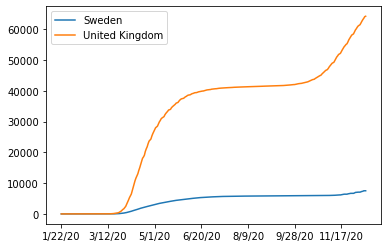

In [66]:
import matplotlib.pyplot as plt
import random

plt.figure(); cropped.plot(); plt.legend(loc='best')

In [67]:
#Change Data so that the numbers are per 100k
# UK 66 m
# Sweden 10m
cropped
#We must now To calculate the pop per 100k
#origonal number / 100k * pop
#orig / 100k *66m
#air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
#air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
cropped['UK_Per100k']         = cropped['United Kingdom'] * (100000 / 66000000)
cropped['Sweeden_Per100k']         = cropped['Sweden'] * (100000 / 10000000)
cropped



,Sweden,United Kingdom,UK_Per100k,Sweeden_Per100k
1/22/20,0,0,0.000000,0.00
1/23/20,0,0,0.000000,0.00
1/24/20,0,0,0.000000,0.00
1/25/20,0,0,0.000000,0.00
1/26/20,0,0,0.000000,0.00
...,...,...,...,...
12/9/20,7296,62566,94.796970,72.96
12/10/20,7354,63082,95.578788,73.54
12/11/20,7514,63506,96.221212,75.14
12/12/20,7514,64026,97.009091,75.14


In [ ]:
#Remove Cumulative columns
cropped = cropped.drop(['Sweden','C'], axis=1)

<Figure size 432x288 with 0 Axes>

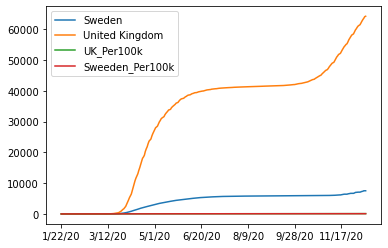

In [68]:
import matplotlib.pyplot as plt
import random

plt.figure(); cropped.plot(); plt.legend(loc='best')

<AxesSubplot:>

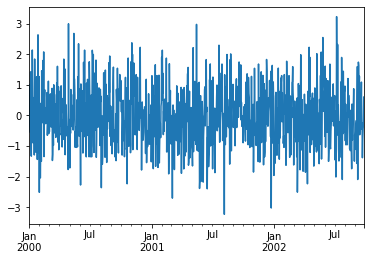

In [34]:
import matplotlib.pyplot as plt
import random

#1. Example of a plot that works (using lists (NOT DATAFRAMES))
ts = pd.Series(np.random.randn(1000),
index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

In [54]:
66000000 / 100000 

660.0

<Figure size 432x288 with 0 Axes>

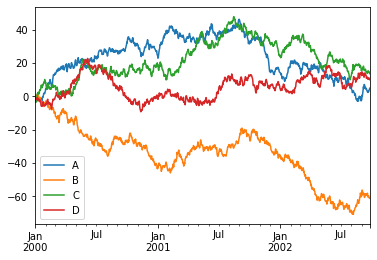

In [35]:
#2. Example of a dataframe plot
#df = DataFrame(randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

In [ ]:
df

In [ ]:
cropped

In [ ]:
# Next step change the 235 and 261 to keys